# Esercizio 1
Riprodurre la seguente figura:
<img width="50%" src ="spiral.png" style="display: block; margin: 0 auto">

Suggerimento: la curva rossa è l'aspirale di Archimede, una cui parametrizzazione è
$$\begin{cases}
x = t \cos(t)\\
y = t \sin(t)
\end{cases}
$$
per $t \geq 0$.



In [7]:
import numpy as np
import matplotlib.pyplot as plt

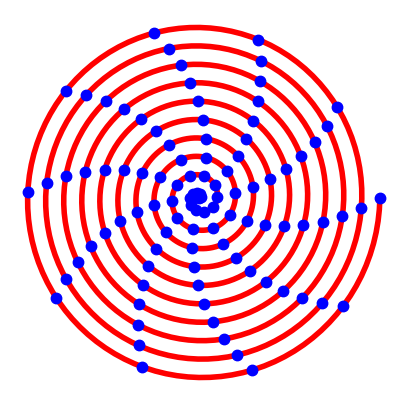

In [79]:
f = lambda t: (t * np.cos(t), t * np.sin(t))

bound = 20*np.pi

#Red line
ts = np.linspace(0, bound, 1000)
xs, ys = f(ts)

#Blue dots
ts1 = np.linspace(0, bound, 100)
xs1, ys1 = f(ts1)

plt.figure(figsize=(5, 5))

plt.box(False)
plt.yticks([], [])
plt.xticks([], [])
plt.axis("off")

plt.plot(xs, ys, "red", linewidth=4)
plt.plot(xs1, ys1, ".", markersize=15, markerfacecolor="b", markeredgecolor="b")

# Esercizio 2
1. Scrivere una funzione per visualizzare i primi $n = 6$ polinomi di Legendre nell'intervallo [-1, 1], tutti in un'unica figura e facendo uso della legenda per distinguerli.
2. Scrivere una seconda funzione che li visualizzi in sottofigure distinte, con il loro indice nelle didascalie.

Suggerimento: `np.polynomial.Legendre.basis(i)` dal modulo `np.polynomial` di NumPy è una funzione che codifica l'$i$-esimo Polinomio di Legendre.



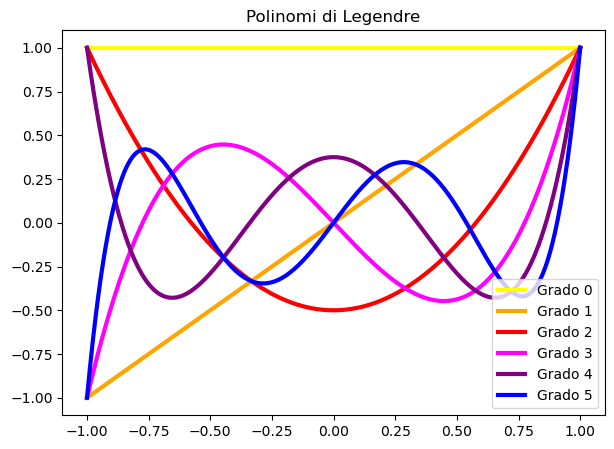

In [87]:
xs = np.linspace(-1, 1, 1000)

colors = ["yellow", "orange", "red", "magenta", "purple", "blue"]

plt.figure(figsize=(7, 5))
plt.title("Polinomi di Legendre")

for i in range(0, 6):
    ys = np.polynomial.Legendre.basis(i)(xs)
    plt.plot(xs, ys, colors[i], linewidth=3, label=f"Grado {i}")
    plt.legend()


Text(0.5, 0.98, 'Grafici dei polinomi di Legendre')

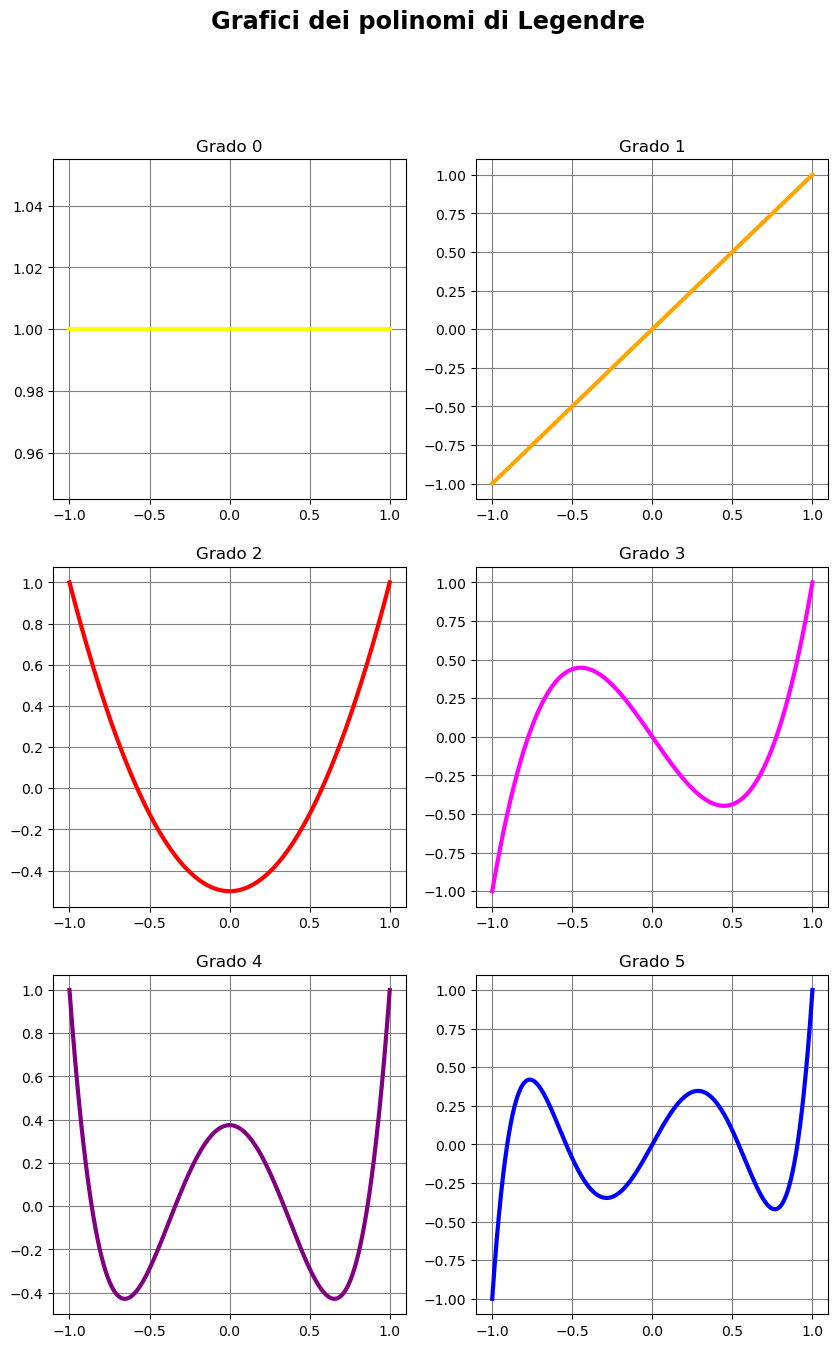

In [103]:
xs = np.linspace(-1, 1, 1000)
colors = ["yellow", "orange", "red", "magenta", "purple", "blue"]

plt.figure(figsize=(10, 15))


for i in range(0,6):
    plt.subplot(3, 2, i+1)
    ys = np.polynomial.Legendre.basis(i)(xs)
    plt.grid(color="grey")
    plt.plot(xs, ys, colors[i], linewidth=3, label=f"Grado {i}")
    plt.title(f"Grado {i}")

plt.suptitle("Grafici dei polinomi di Legendre", size="xx-large",weight="heavy")

# Esercizio 3
Ricordando la successione di Collaz, dal blocco di Esercizi 1, disegnare nel piano con dei markers il più grande numero raggiunto dalla successione che parte da $a_0 = x_0 \in [1, 5000]$. Restringere i valori di $y$ all'intervallo [1, 50000] e fare un formato della figura "stretta e alta".


In [156]:
# Per conoscere il valore massimo raggiunto dalla successione di Collatz, 
# non c'è altro modo se non quello di calcolarla fino a quando non raggiunge 1.

ns = np.arange(1, 5+1, dtype="int") 

results = np.array([ns, ])

while not (ns == 1).all():
    even    = (np.mod(ns, 2) == 0)
    odd     = (np.mod(ns, 2) == 1)


    ns[even] //= 2
    ns[odd] *= 3
    ns[odd] += 1

    np.insert(results, np.arange(0, 5), ns)

results



KeyboardInterrupt: 


# Esercizio 4
Ricordando la definizione dell'insieme di Mandelbrot vista a lezione, scrivere una funzione che restituisca la matrice contenente per ogni $c \in \mathbb{C}$, il minimo indice $i$ tale che $|z_{i+1}| > 2$. 

Una volta che siete certi che la funzione sia corretta, chiamatela con:
* vettori $x$ e $y$ da 2501 elementi,
* iterazioni massime $n = 1200$.

(Ci mette un po' con questi settaggi, per questo motivo siate certi che è corretta: altrimenti aspettate per nulla).

Visualizzare la matrice come immagine usando una risoluzione alta, per esempio 1200 dpi e la colormap  `"flag"`.

Provate visualizzazioni in dei sotto-domini, in modo da zoomare su alcune zone dell'insieme di Manderlbrot: per esempio $[-0.7450, -0.7425] \times [0.1300, 0.1325]$.
